In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.model_selection import train_test_split

#https://seaborn.pydata.org/installing.html
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:
# Load the datasets
tesla_stocks_df = pd.read_csv('../Data/daily_return_day.csv',index_col='date')
tsdf=tesla_stocks_df.copy(deep=True)

elon_musk_df = pd.read_csv('../Data/avg_tweet_sent_score_day.csv', index_col='date')
emdf=elon_musk_df.copy(deep=True)

print("Tesla Stocks Dataframe Head is: \n")
print(tsdf.head())
print("Elon Musk Dataframe Head is: \n")
print(emdf.head())

print("Tesla Stocks Dataframe Count is: \n")
print(tsdf.count())
print("Elon Musk Dataframe Count is: \n")
print(emdf.count())



Tesla Stocks Dataframe Head is: 

            daily_return
date                    
2015-02-02      0.034172
2015-02-03      0.024107
2015-02-04      0.001191
2015-02-05      0.005048
2015-02-06     -0.020901
Elon Musk Dataframe Head is: 

            avg_sent_score
date                      
2015-02-08        0.147743
2015-02-10       -0.035833
2015-02-11        0.202656
2015-02-12        0.000000
2015-02-24        0.500000
Tesla Stocks Dataframe Count is: 

daily_return    1371
dtype: int64
Elon Musk Dataframe Count is: 

avg_sent_score    1359
dtype: int64


In [3]:
#https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
date_idx = pd.date_range('02-01-2015', '07-14-2020')


tsdf.index = pd.DatetimeIndex(tsdf.index)

tsdf = tsdf.reindex(date_idx, fill_value=2)

emdf.index = pd.DatetimeIndex(emdf.index)

emdf = emdf.reindex(date_idx, fill_value=2)

print("Tesla Stocks Dataframe Head is: \n")
print(tsdf.head())
print("Elon Musk Dataframe Head is: \n")
print(emdf.head()) 
print("\n")



Tesla Stocks Dataframe Head is: 

            daily_return
2015-02-01      2.000000
2015-02-02      0.034172
2015-02-03      0.024107
2015-02-04      0.001191
2015-02-05      0.005048
Elon Musk Dataframe Head is: 

            avg_sent_score
2015-02-01             2.0
2015-02-02             2.0
2015-02-03             2.0
2015-02-04             2.0
2015-02-05             2.0




In [4]:
print("Tesla Stocks Dataframe Value Count is: \n")
print(tsdf.value_counts())
print("Elon Musk Dataframe Value Count is: \n")
print(emdf.value_counts())


Tesla Stocks Dataframe Value Count is: 

daily_return
 2.000000       620
 0.001620         2
 0.008346         1
 0.008781         1
 0.008756         1
               ... 
-0.008054         1
-0.008065         1
-0.008069         1
-0.008070         1
 0.000519         1
Name: count, Length: 1371, dtype: int64
Elon Musk Dataframe Value Count is: 

avg_sent_score
2.000000          632
0.000000          147
0.250000           21
0.500000           19
0.050000           13
                 ... 
0.088135            1
0.088214            1
0.089250            1
0.089444            1
0.121225            1
Name: count, Length: 925, dtype: int64


In [5]:
resultdf = pd.concat([emdf, tsdf], axis=1, join='inner')
display(resultdf.head)
#https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/#
#https://stackoverflow.com/questions/69507086/remove-all-rows-having-a-specific-value-in-dataframe
mask=(resultdf==2.0).any(axis = 1)
resultdf=resultdf[~mask]
display(resultdf.head)

<bound method NDFrame.head of             avg_sent_score  daily_return
2015-02-01        2.000000      2.000000
2015-02-02        2.000000      0.034172
2015-02-03        2.000000      0.024107
2015-02-04        2.000000      0.001191
2015-02-05        2.000000      0.005048
...                    ...           ...
2020-07-10        0.183788      0.106483
2020-07-11        0.050000      2.000000
2020-07-12        0.383333      2.000000
2020-07-13        0.150587     -0.097613
2020-07-14        0.300000      2.000000

[1991 rows x 2 columns]>

<bound method NDFrame.head of             avg_sent_score  daily_return
2015-02-10       -0.035833     -0.005792
2015-02-11        0.202656      0.002780
2015-02-12        0.000000      0.048096
2015-02-24        0.500000     -0.015341
2015-02-26        0.165000      0.015637
...                    ...           ...
2020-07-07        0.008333     -0.010783
2020-07-08        0.600000     -0.027843
2020-07-09        0.107813     -0.001940
2020-07-10        0.183788      0.106483
2020-07-13        0.150587     -0.097613

[946 rows x 2 columns]>

In [6]:

resultdf_X = resultdf.drop(columns=['daily_return'])
resultdf_y = resultdf['daily_return']

X_dev, X_test, y_dev, y_test = train_test_split(resultdf_X, resultdf_y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

In [7]:
print(y_train.shape)

#y_train = y_train.reshape((-1))
#y_val = y_val.reshape((-1))
#y_test = y_test.reshape((-1))


svr = LinearSVR()
svr.fit(X_train, y_train)


(567,)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [8]:

print(f'Train Score: {svr.score(X_train, y_train)}')
print(f'Validation Score: {svr.score(X_val, y_val)}')
print(f'Test Score: {svr.score(X_test, y_test)}')

Train Score: 0.0014085335726807813
Validation Score: -0.008391435774018685
Test Score: -0.0033015594121295067


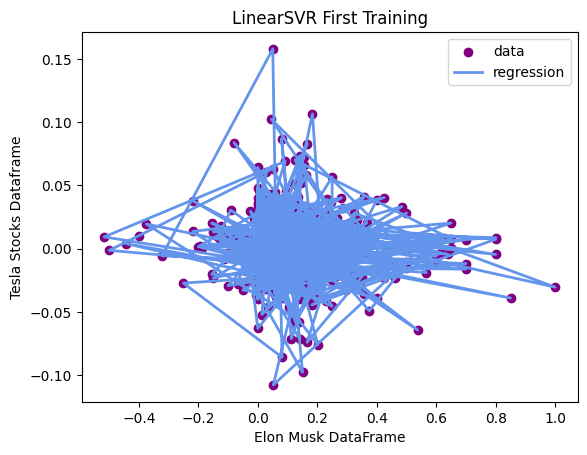

In [27]:
# Predict on a range of values
# X_pred = np.linspace(0, 10, 100)[:, np.newaxis]
# y_pred = svr.predict(X_pred)

# Plot the training data points
plt.scatter(X_train, y_train, color='purple', label='data')

# Plot the predicted values
# plt.plot(X_train, y_train, color='yellow', label='predicted')

# Plot the regression line
plt.plot(X_train, y_train, color='cornflowerblue', linewidth=2, label='regression')

plt.xlabel('Elon Musk DataFrame')
plt.ylabel('Tesla Stocks Dataframe')
plt.title('LinearSVR First Training')
plt.legend()
plt.show()

In [10]:
emdf=emdf.replace(2,0)
tsdf=tsdf.replace(2,0)

In [11]:
X_dev2, X_test2, y_dev2, y_test2 = train_test_split(emdf, tsdf, test_size=0.2, random_state=0)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_dev2, y_dev2, test_size=0.25, random_state=0)

In [12]:
svr2 = LinearSVR()
svr2.fit(X_train2, y_train2)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [13]:
print(f'Train Score: {svr2.score(X_train2, y_train2)}')
print(f'Validation Score: {svr2.score(X_val2, y_val2)}')
print(f'Test Score: {svr2.score(X_test2, y_test2)}')

Train Score: -0.0017471346401682908
Validation Score: -8.813145969321923e-05
Test Score: 8.755256157499947e-05


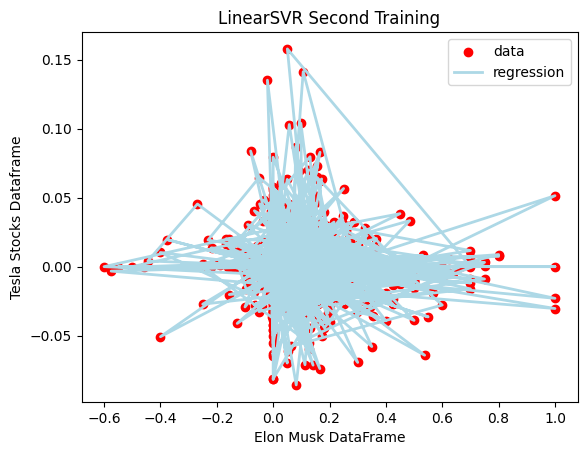

In [28]:
# Predict on a range of values
# X_pred = np.linspace(0, 5, 100)[:, np.newaxis]
# y_pred = svr2.predict(X_pred)

# Plot the training data points
plt.scatter(X_train2, y_train2, color='red', label='data')

# Plot the predicted values
# plt.plot(X_train2, y_train2, color='purple', label='predicted')

# Plot the regression line
plt.plot(X_train2, y_train2, color='lightblue', linewidth=2, label='regression')

plt.xlabel('Elon Musk DataFrame')
plt.ylabel('Tesla Stocks Dataframe')
plt.title('LinearSVR Second Training')
plt.legend()
plt.show()